## Ordinary Differential Equations (ODE)


Differential equations help to model the relations between variables and their derivatives. They are used to model systems in every engineering and science field. For example, a simple differential equation relates the acceleration of a car with its position. 

In general, finding exact solutions to differential equations is difficult and ofter imposible. Therefore, numerical solutions are critical to making these equations useful for designing and understanding engineering and science systems.

Because differential equations are so common in engineering, physics, and mathematics, the study of them is a vast and rich field. Today, we are going to learn about ordinary differential equations with specified initial values, a subclass of differential equations problems called initial value problems.

An ordinary differential equation relates a function $f(x)$, its independent variable $x$, and any numnber of its derivatives. In general, an ODE can be expressed as 

$$
F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}},
$$

where $F$ is an arbitraty functions. 

#### Example 

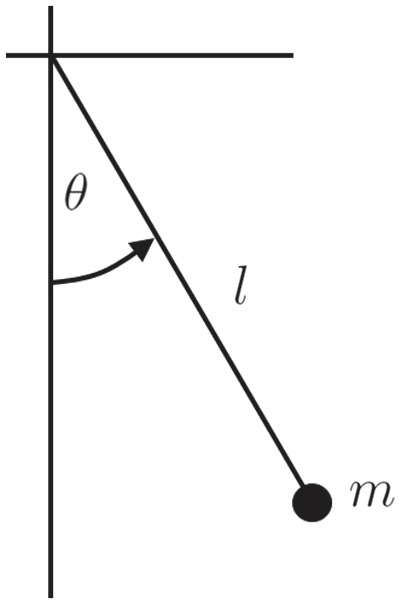

The ODE that describes a inverted pendulum is given by 
$$
ml\frac{d^2\Theta(t)}{dt^2} = -mg \sin(\Theta(t)).
$$

where
$$
\begin{matrix}
l & -> & \text{Pendumum lenght} \\
m & -> & \text{Pendumum mass} \\
g & -> & \text{Gravity} \\
\Theta(t) & -> & \text{Angle the pendulum makes with the vertical } \\
\end{matrix}
$$

A general solution to a differential equation is a $h(x)$ that satisfies the differential equation.

If we assume that the pendulum doesn't move too much, then $\Theta(t) \approx \sin(\Theta(t))$ 
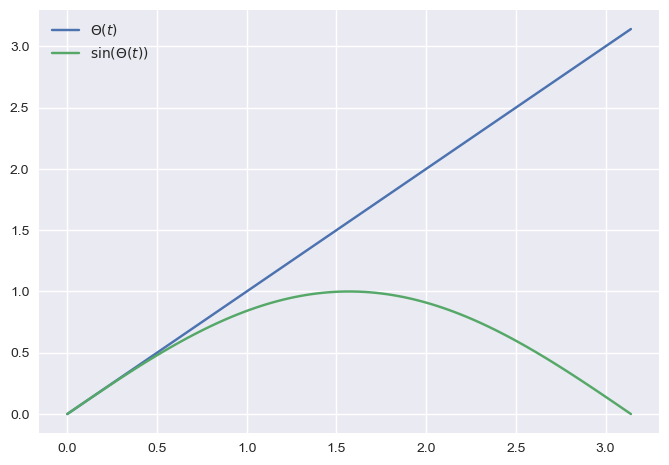

we can approximate the differential equation for

$$
l\frac{d^2\Theta(t)}{dt^2} = -g \Theta(t).
$$

A solution for this equation is given by 
$$
\Theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)
$$

We can verify this solution by finding its derivatives and using them in the original equation 
$$
\begin{eqnarray}
\frac{d\Theta(t)}{dt} & = -\sqrt{\frac{g}{l}}\sin\left(\sqrt{\frac{g}{l}}t\right)  \\
\frac{d^2\Theta(t)}{dt^2} & = -\frac{g}{l}\cos\left(\sqrt{\frac{g}{l}}t\right),
\end{eqnarray}
$$
or
$$
l\frac{d^2\Theta(t)}{dt^2} = -g \Theta(t).
$$


If we go beyond the assumption of small angles ($\Theta > 1 deg$) then this solution is no longer valid. However, an exact solution for the general problem is difficult to determine. Numerical methods can help us to solve this problem without the need to determine an analytical solution

## Initial Value Problem 

For a certain class of ordinary differential equations, the initial value is sufficient to find a unique particular solution. Finding a solution to an ODE given an initial value is called the initial value problem.

For an ODE of order n, the initial value is a known value for the $0^{th}$ to $(n−1)^{th}$ derivatives at $x=0$.

### Reduction of order 

Many numerical methods for solving initial value problems are designed specifically to solve first-order differential equations. To make these solvers useful for solving higher order differential equations, we must often reduce the order of the differential equation to first order.

Consider a generic differential equation of order $n$
$$
f^{(n)}(t) = F\left(t, f(t), f^{(1)}(t), f^{(2)}(t), f^{(3)}(t),\ldots, f^{(n-1)}(t)\right),
$$

where $f^{(n)}(t) = \frac{df^{n}}{dt^{n}}$ is the $n^{th}$ order derivative. 

To reduce the order of the system, consider a state equation given by 

$$
S(t) =\left[\begin{array}{c}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\cdots \\
f^{(n-1)}(t)
\end{array}\right]
$$

and the derivative of the state is
$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
f^{(n)}(t)
\end{array}\right]\!=\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
F\left(t, f(t), f^{(1)}(t),\ldots, f^{(n-1)}(t)\right)
\end{array}\right]\!=\!\left[\begin{array}{c}
S_2(t) \\
S_3(t) \\
S_4(t) \\
S_5(t) \\
\cdots \\
F\left(t, S_1(t), S_2(t),\ldots, S_{n-1}(t)\right)
\end{array}\right].
$$

With the state written in this way, $\frac{dS(t)}{dt}$ can be written using only $S(t)$.  This equation is in the form of a first-order differential equation in $S$. Essentially, what we have done is turn an $n^{th}$ order ODE into $n$ first order ODEs that are coupled together, meaning they share the same terms.

#### Example
$$
\ddot{\Theta}(t) = -\frac{g}{l} \Theta(t).
$$

The state vector can be written as
$$
S(t) =\left[\begin{array}{c}
\Theta(t) \\
\dot{\Theta}(t)
\end{array}\right] = \left[\begin{array}{c}
S_{1}(t) \\
S_{2}(t)
\end{array}\right].
$$

Taking the derivative of the state vector gives 
$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
\dot{\Theta}(t)\\
\ddot{\Theta}(t)
\end{array}\right] = \left[\begin{array}{c}
S_{2}(t)\\
-\frac{g}{l} S_{1}(t)
\end{array}\right]
$$

or

$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]  \left[\begin{array}{c}
S_{1}(t) \\
S_{2}(t)
\end{array}\right] =\left[\begin{array}{c}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]  S(t)
$$
ODEs that can be written in this way are said to be linear ODEs.

#### Exercise A
Here is a simple model to describe population change
$$
\begin{eqnarray}
\frac{dr(t)}{dt} &= 4r(t) - 2w(t) \\
\frac{dw(t)}{dt} &= r(t) + w(t).
\end{eqnarray}
$$

Demonstrate that the state equation for this system is 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
4 & -2 \\
1 & 1
\end{array}\right]S(t).
$$

#### Exercise B
Here is a simple model to a spring-daper-mass system

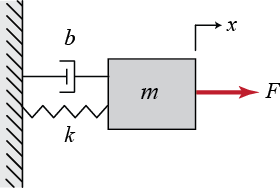

$$
m\ddot{x} + b\dot{x} + kx =  F(t),
$$
where $F(t)$ is the force applied to the mass.

Demonstrate that the state equation for this system is 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
-\frac{k}{m} & -\frac{b}{m}
\end{array}\right]S(t) + \left[\begin{array}{cc}
0  \\
\frac{1}{m}
\end{array}\right]F(t).
$$
and 
$$
S(t) = \left[\begin{array}{cc}
x(t) \\
\dot{x}(t)
\end{array}\right] .
$$

#### Exercise C
Here is a simple model to a circuit with a resistor, capacitor, and inductance 

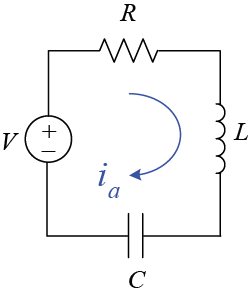

$$
Ri + L\frac{di}{dt} + \frac{1}{C}\int idt = V(t),
$$
where $V(t)$ is the voltage applied to the circuit.

Demonstrate that the state equation for this system is 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
-\frac{1}{LC} & -\frac{R}{L}
\end{array}\right]S(t)+ \left[\begin{array}{cc}
0  \\
\frac{1}{L}
\end{array}\right]V(t).
$$
and 
$$
S(t) = \left[\begin{array}{cc}
\int i(t)dt \\
i(t)
\end{array}\right].
$$

### Exercise D
Write a state representation of the following third order differential equation 
$$
\dddot{x}+7\ddot{x}+19\dot{x}+13x = 26u
$$

Hint, use the following state vector
$$
\frac{dS(t)}{dt} = \left[\begin{array}{c}
x \\
\dot{x} \\
\ddot{x}
\end{array}\right] = \left[\begin{array}{c}
S_{1}(t) \\
S_{2}(t)\\
S_{3}(t)
\end{array}\right].
$$



## Explicit Euler Formula for Differential Equations 

Assume a first order differential equation $\frac{dS(t)}{dt} = F(t,S(t))$, and let $t$ be a evenly spaced grid on the interval $[t_0,t_f]$.

Without loss of generality, we assume that $t_0=0$, and that $t_f=Nh$ for some positive integer $N$, with $h$ defining the space beteween elements in the grid. 

The linear approximation of $S(t)$ around $t_j$ and $t_{j+1}$ is given by 
$$
S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt},
$$
or
$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$
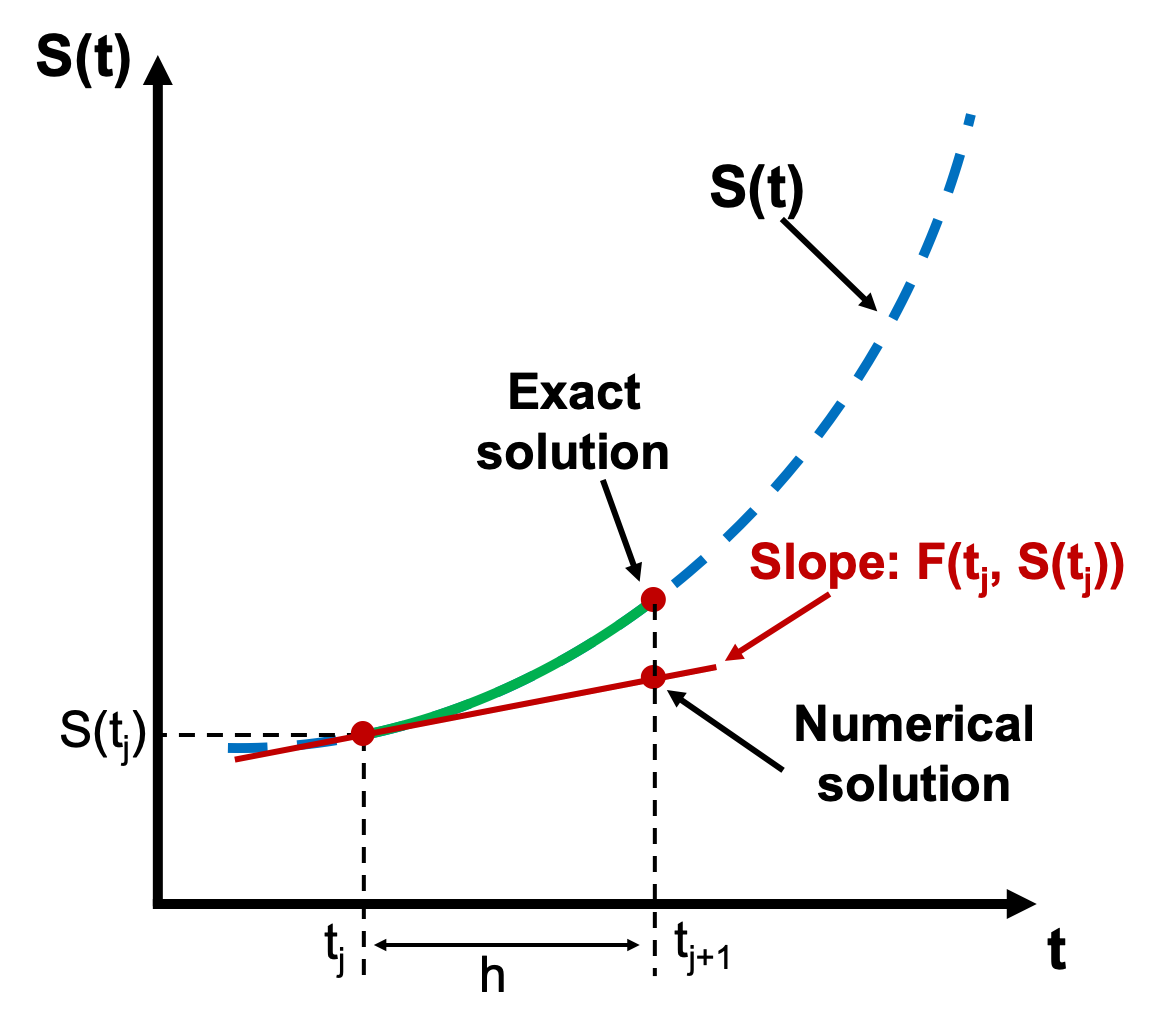


This formula is called the **Explicit Euler Formula**, and it allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from a given initial value of $S_{0}=S(t_{0})$.

To apply the Euler formula given a function $F(t,S(t)) that computes $\dot{S}(t)$, a numerical grid $t$ with interval $h$, and initial values $S_0 = S(t_0)$, we can compute $S(t)$ following a series of steps:

1. Store $S_0 = S(t_0)$ in an array, $S$.
2. Compute $S(t_1) = S_0 + hF(t_0, S_0)$.
3. Store  $S_1 = S(t_1)$ in $S$.
4. Compute $S(t_2) = S_1 + hF(t_1, S_1)$
5. Store  $S_2 = S(t_2)$ in $S$.
6. ...
7. Compute $S(t_f) = S_{f-1} + hF(t_{f-1}, S_{f-1})$.
8. Store $S_f=S(t_f) in S$.

S is an approximation of the solution to the initial value problem.

### Example

$$
\frac{df}{dt} = e^{-t}
$$
with 
$f_{0}=-1$.

The exact solution is $f(t) = -e^{-t}$. 

We can find an approximate solution for this initial value problem between 0 and 1 with increments of 0.1 using the Euler formula

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

#function to solve 
def func(t):
    return np.exp(-t)
    
h = 0.1
t = np.arange(0,1+h,h) #grid

s0 = -1 # initial value 

s = np.zeros(len(t))
s[0] = s0
for i in range(0,len(t)-1):
    s[i+1] = s[i] + h*func(t[i])

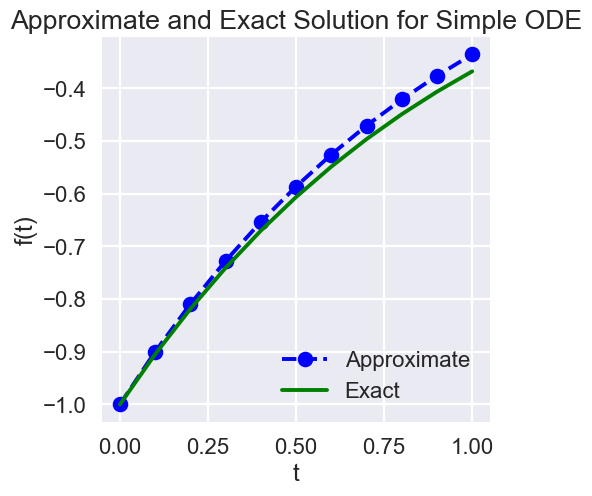

In [40]:
plt.figure(figsize = (5, 5))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

The error can be reduced by decreasing $h$

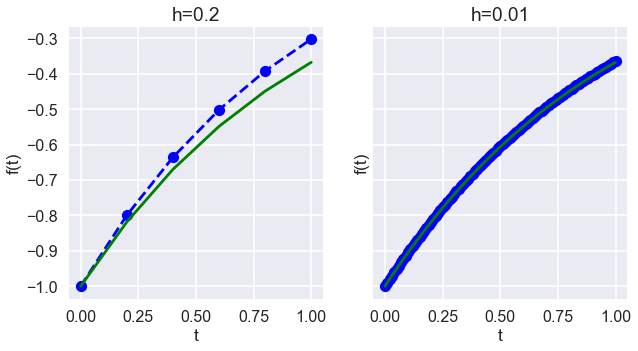

In [141]:
fig,ax = plt.subplots(1,2,figsize = (10, 5), sharey=True)

#function to solve 
def func(t,s):
    dsdt = np.exp(-t)
    return dsdt

h = 0.2
t = np.arange(0,1+h,h) #grid
s0 = -1 # initial value 
s = np.zeros(len(t))
s[0] = s0
for i in range(0,len(t)-1):
    s[i+1] = s[i] + h*func(t[i],s[i])
    

ax[0].plot(t, s, 'bo--', label='Approximate')
ax[0].plot(t, -np.exp(-t), 'g', label='Exact')
ax[0].set_title('h=0.2')
ax[0].set_xlabel('t')
ax[0].set_ylabel('f(t)')
#ax[0].set_legend(loc='lower right')

h = 0.01
t = np.arange(0,1+h,h) #grid
s0 = -1 # initial value 
s = np.zeros(len(t))
s[0] = s0
for i in range(0,len(t)-1):
    s[i+1] = s[i] + h*func(t[i],s[i])
    

ax[1].plot(t, s, 'bo--', label='Approximate')
ax[1].plot(t, -np.exp(-t), 'g', label='Exact')
ax[1].set_title('h=0.01')
ax[1].set_xlabel('t')
ax[1].set_ylabel('f(t)')
#ax[1].set_legend(loc='lower right')

plt.show()

However, the explicit Euler formula is not great for more complex models. Let's simulate the linear version of the inverted pendulum for the time interval $[0,5]$

$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]  S(t)
$$

where 
$$
S(t) =\left[\begin{array}{c}
\Theta(t) \\
\dot{\Theta}(t)
\end{array}\right] 
$$

with 
$$
S(0) =\left[\begin{array}{c}
1 \\
0
\end{array}\right] 
$$ and 
$$
\sqrt{\frac{g}{l}} =4
$$

In [161]:
#function to solve
def func(t,s,w):
    dsdt = np.array([[0,1],[-w**2,0]])@s
    return dsdt

h=0.1
time = np.arange(0,5+h,h)
s0 = np.array([[1],[0]])
s = np.zeros((len(time),2))
s[0,:] = s0.T
w = 4 #(g/l)^(1/2)

for i in range(0,len(time)-1):
    s[i+1,:] = s[i,:] + h*func(i,s[i,:],w)

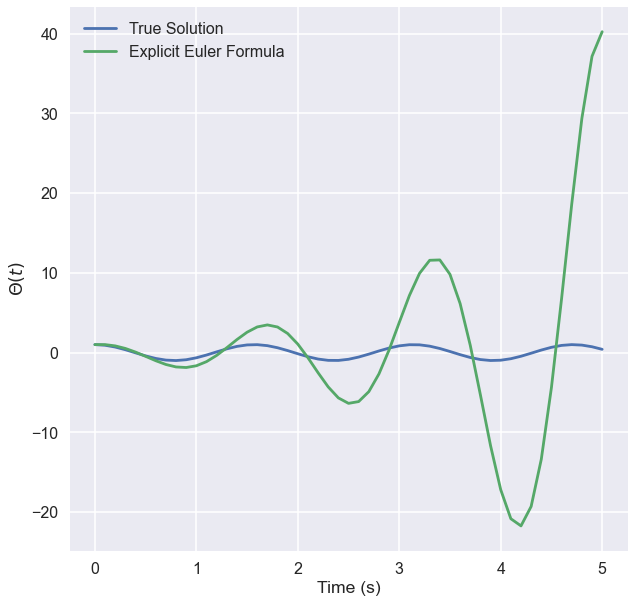

In [162]:
plt.figure(figsize = (10, 10))
plt.plot(time, np.cos(w*time),label='True Solution')
plt.plot(time,s[:,0], label = 'Explicit Euler Formula')
plt.xlabel('Time (s)')
plt.ylabel('$\Theta(t)$')
plt.legend()
plt.show()

## Runge Kutta (RK) Methods 

In practice, Euler methods are not feaseable because they propagate the error. Alternative approahces, such as the Runge Kutta methods employ higher order approximation and a correction step to minimize the influence of error in the predictions. 

### RK2 Method
The RK2 method is an extension of the Extrensic Euler Formula that uses a second order approximation. The RK2 method is given by 
$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+h, S(t_j)+hk_1\right)\\
\end{eqnarray*}
$$
$$
S(t_{j+1}) = S(t_j) + \frac{1}{2}(k_1+k_2)h
$$

with 
$$
F(t_j,S(t_j)) = \frac{dS(t_j)}{t_j}
$$

The error of the RK4 method is $\mathcal{O}(h^2)$. In contrast, the error of the Explicit Euler method (or RK1) is $\mathcal{O}(h)$.

In [11]:
def func(t,s,w):
    
    dsdt = np.array([[0,1],[-w**2,0]])@s
    
    return dsdt

h=0.1
time = np.arange(0,5+h,h)
s0 = np.array([[1],[0]])
s = np.zeros((len(time),2))
s[0,:] = s0.T
w = 4 #(g/l)^(1/2)

for i in range(0,len(time)-1):
    
    k1 = func(time[i],s[i,:],w)
    
    k2 = func(time[i] + h/2,s[i,:] + h*k1,w)
    
    s[i+1,:] = s[i,:] + (h/2)*(k1+k2)

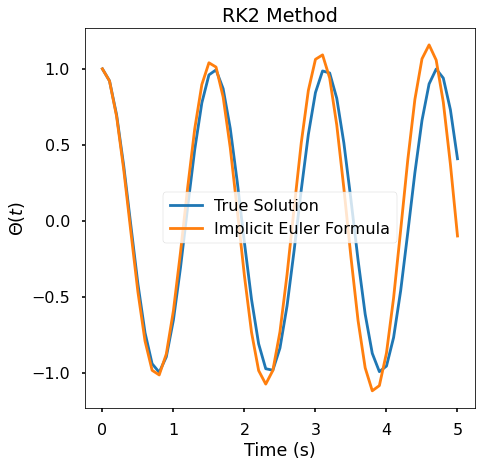

In [12]:
plt.figure(figsize = (7, 7))
plt.plot(time, np.cos(w*time),label='True Solution')
plt.plot(time,s[:,0], label = 'Implicit Euler Formula')
plt.xlabel('Time (s)')
plt.ylabel('$\Theta(t)$')
plt.title('RK2 Method')
plt.legend()
plt.show()

That is a big improvement compared to the simple Euler Method, but there is still room to improve. 

### RK4
One of the most popular methods to solve ODE is the RK4 method, that uses a fourth-order approximation and is given by 
$$
\begin{split}
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h\right)\\
k_3 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h\right)\\
k_4 & = & F(t_j+h,S(t_j)+k_3h)
\end{eqnarray*}
\end{split}
$$

$$
S(t_{j+1}) = S(t_j) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right).
$$


The error of the RK4 method is $\mathcal{O}(h^4)$. In contrast, the error of the Explicit Euler method (or RK1) is $\mathcal{O}(h)$.

In [13]:
def func(t,s,w):
    return np.array([[0,1],[-w**2,0]])@s

h=0.1
time = np.arange(0,5+h,h)
s0 = np.array([[1],[0]])
s = np.zeros((len(time),2))
s[0,:] = s0.T
w = 4 #(g/l)^(1/2)

for i in range(0,len(time)-1):
    
    k1 = func(time[i],s[i,:],w)
    
    k2 = func(time[i] + h/2,s[i,:] + (h/2)*k1,w)
    
    k3 = func(time[i] + h/2,s[i,:] + (h/2)*k2,w)
    
    k4 = func(time[i] + h,s[i,:] + h*k2,w)
    
    s[i+1,:] = s[i,:] + (h/6)*(k1+2*k2+2*k3+k4)

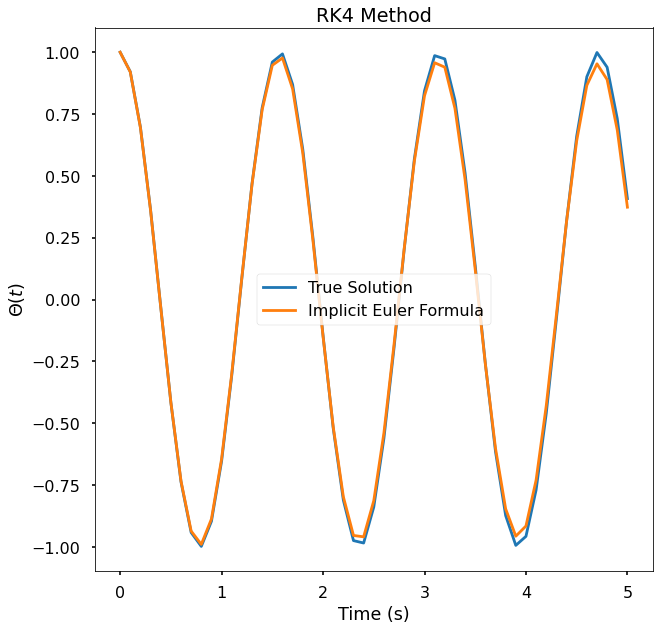

In [14]:
plt.figure(figsize = (10, 10))
plt.plot(time, np.cos(w*time),label='True Solution')
plt.plot(time,s[:,0], label = 'Implicit Euler Formula')
plt.xlabel('Time (s)')
plt.ylabel('$\Theta(t)$')
plt.title('RK4 Method')
plt.legend()
plt.show()

Pretty Close !!

## Using Python build-in functions 

Given the importance of ODE solvers, several methods are already implemented in Python and many other languages. These methods are typically part of the Runge Kutta family, but other alternative approaches have also been proposed over the years. 

Next, we will learn how to use python to solve a first order differential equation using the RK5 method (Runge Kutta order 5).

### Example 1

In this example, we will solve the differential equation 

$$
\frac{dS(t)}{dt} = cos(t)
$$

The analytical solution is 

$$
S(t) = sin(t)
$$

Assume that $S(0)=0$ and you are interested in the range between $[0,2\pi]$

We will use the function 
```python 
solve_ivp(func, t_span, s0, method='RK45' t_eval=time_vector)
```
where
```python
func -> Function to solve
t_span -> The interval of integration [t_0,t_end]
s0 -> Initial conditions
method -> Method used to solve the ODE (default is 'RK45')
t_eval -> time vector to perform integration 
```

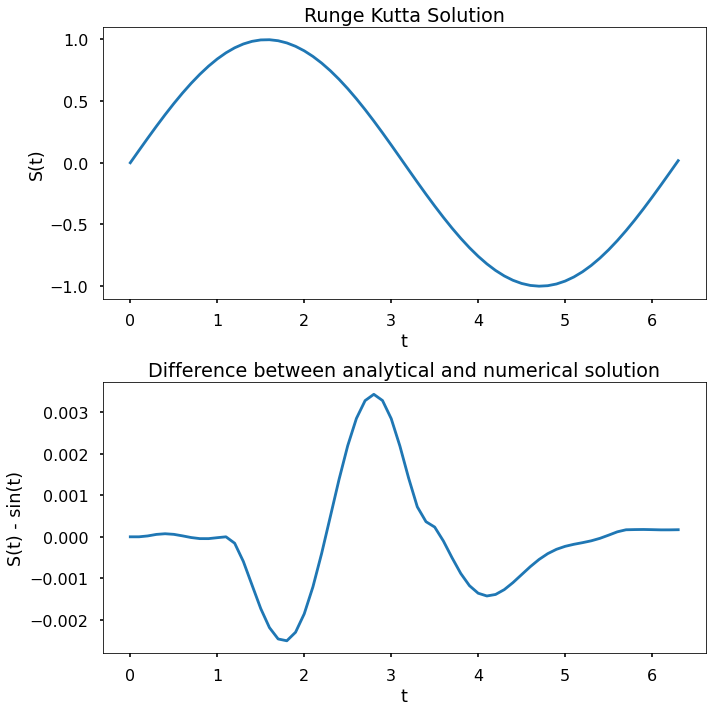

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

def func(t,s):
    dsdt = np.cos(t)
    return dsdt

h = 0.1
t_eval = np.arange(0, 2*np.pi + h, h)
S0 = np.array([0])
sol = solve_ivp(func, [t_eval[0], t_eval[-1]], S0, t_eval=t_eval)

plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Runge Kutta Solution')
plt.subplot(212)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.title('Difference between analytical and numerical solution')
plt.tight_layout()
plt.show()

### Example 2

In this example, we will solve the differential equation 

$$
\frac{dS(t)}{dt} = -S(t)
$$

The analytical solution is 

$$
S(t) = e^{-t}
$$

Assume that $S(0)=1$ and you are interested in the range between $[0,2]$

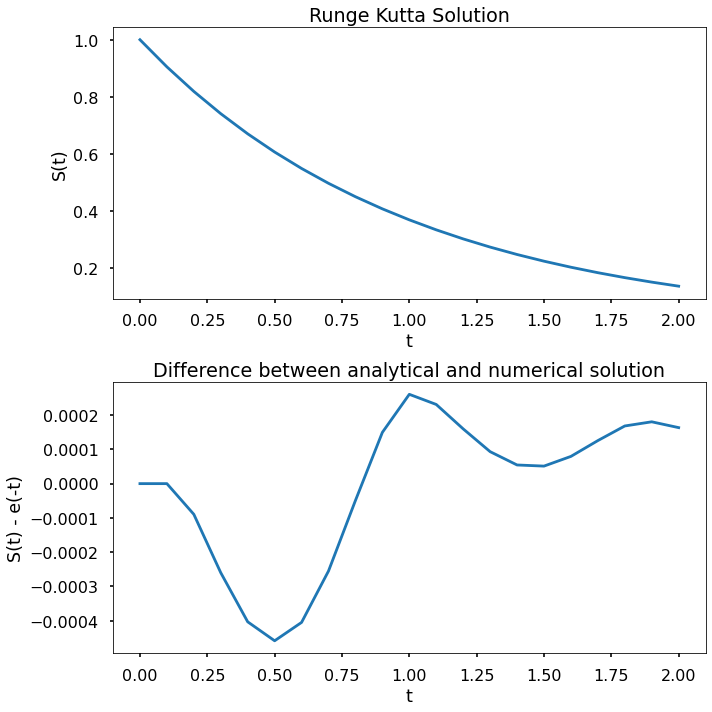

In [17]:
def func(t,s):
    dsdt = -s
    return dsdt

h = 0.1
t_eval = np.arange(0, 2 + h, h)
S0 = np.array([1])
sol = solve_ivp(func, [t_eval[0], t_eval[-1]], S0, t_eval=t_eval)

plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Runge Kutta Solution')
plt.subplot(212)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - e(-t)')
plt.title('Difference between analytical and numerical solution')
plt.tight_layout()
plt.show()

### Example 3

In this example, we will solve the differential equation 

$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2\\
-t & 0
\end{array}\right]S(t)
$$

Assume that

$$
S(0) = \left[\begin{array}{c}
1\\
1
\end{array}\right]
$$

and you are interested in the range between $[0,5]$.

**Note that we don't know the analytical solution for this problem**

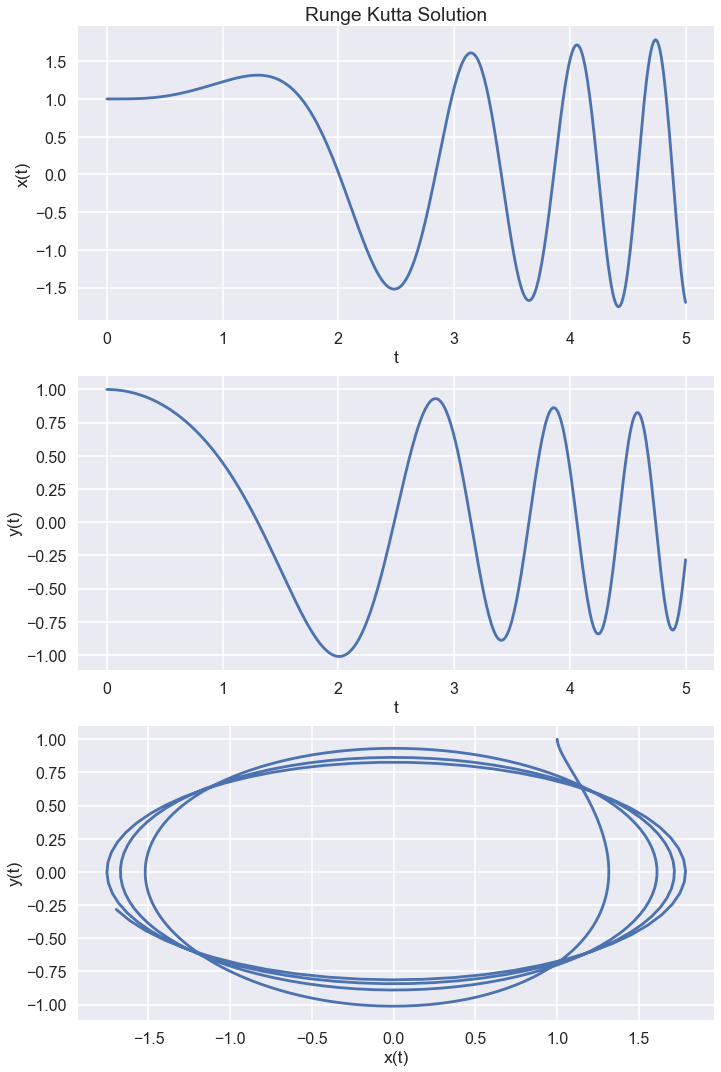

In [110]:
def func(t,s):
    dsdt = np.array([[0,t**2],[-t,0]])@s
    return dsdt

h = 0.01
t_eval = np.arange(0, 5 + h, h)
S0 = np.array([1, 1])
sol = solve_ivp(func, [t_eval[0], t_eval[-1]], S0, t_eval=t_eval)

plt.figure(figsize = (10, 15))
plt.subplot(3,1,1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Runge Kutta Solution')
plt.subplot(3,1,2)
plt.plot(sol.t, sol.y[1])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.subplot(3,1,3)
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.tight_layout()
plt.show()

### Example 4

In this example, we will solve the logistic equation of population growth. This equation describes how a population grows given a grow rate $r$ and a carrying capacity $K$. The differential equation is 

$$
\frac{dS(t)}{dt} = rS(t)\left(1-\frac{S(t)}{K}\right)
$$

Assume that

$$
S(0) = 10
$$

and you are interested in the range between $[0,20]$ with $h=0.1$. 


This problem requieres to create a function that receives time, state, and multiple parameters as input. That is 


In [18]:
def logistic_eq(t,s,r,K):
    dsdt = r*s*(1-s/K)
    return dsdt

One problem that we see, is that the ```solve_ivp``` function takes a function that only takes two paremeters, the time and state. 

For functions that receive more arguments, you should explicity indicate those arguments to the ```solve_ivp``` function

In [19]:
#the second solution is more general, so we should try that one
#for that, we will use a special Python function called partial

r = 1.5
K = 20
h=0.1
t_eval = np.arange(0,20+h,h)
S0 = np.array([10])
sol = solve_ivp(logistic_eq, [t_eval[0], t_eval[-1]], S0, t_eval=t_eval, args=(r,K))

Note that we are using the special input ```args``` and passing the values in a tuple in the same order as the original function

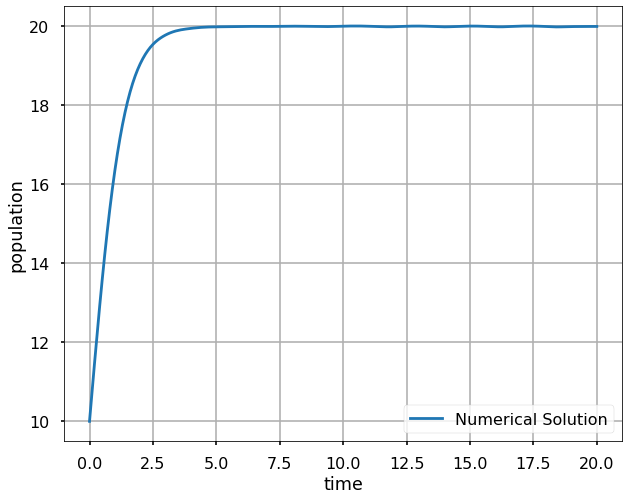

In [20]:
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution'])
plt.grid(True)
plt.show()


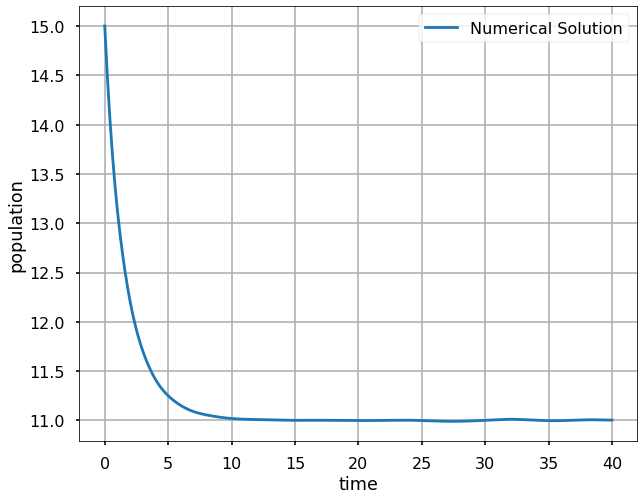

In [21]:
#we can change the model parameters and see what happens 
r = 0.5
K = 11
h=0.1
t_eval = np.arange(0,40+h,h)
S0 = np.array([15])
sol = solve_ivp(logistic_eq, [t_eval[0], t_eval[-1]], S0, t_eval=t_eval, args=(r,K))
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution'])
plt.grid(True)
plt.show()

The logistic equation has an analytical solution
$$
S(t)=\frac{KS(0)e^{rt}}{K + S(0)(e^{rt}-1)}
$$

you should verify that this is a valida solution to the problem and how it compares to the numerical solution. 

### Example 5

Finally, we will solve a ODE with an input $u(t)$ in the form 

$$
\frac{dS(t)}{dt} = -S(t)+a*u(t)
$$

Assume that

$$
S(0) = 0
$$

and you are interested in the range between $[0,10]$ with $h=0.1$, and

$u(t) = 1 \ if \ t<3, \ otherwise \ 0$ 


Text(0, 0.5, 'x(t)')

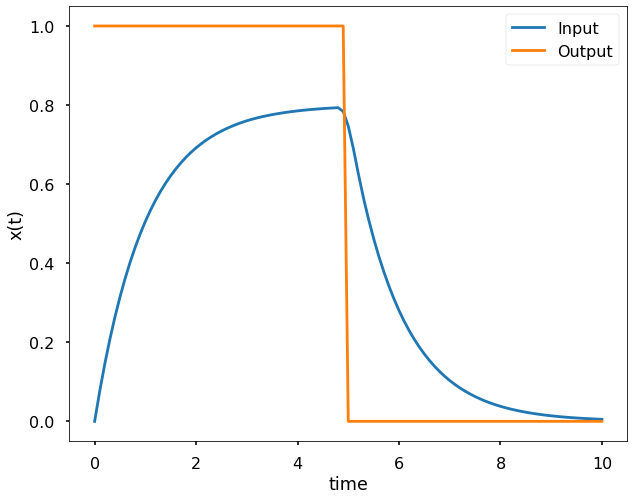

In [25]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

def func(t,s,u_fun,a):
    dsdt = -s+a*u_fun(t)
    return dsdt

h = 0.1
t_eval = np.arange(0,10+h,h)
u = np.zeros_like(t_eval)
u[t_eval<5]=1
u_fun = interp1d(x=t_eval, y=u) # we are creating a way to evaluate u at each t using linear interpolation     


S0 = np.array([0])
a=0.8
sol = solve_ivp(func, [t_eval[0], t_eval[-1]], S0, t_eval=t_eval, args=(u_fun,a))
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0], label='Input')
plt.plot(sol.t, u, label='Output')
plt.legend()
plt.xlabel('time')
plt.ylabel('x(t)')


## NOTE:
if the method 'RK45' gives you unexpected results, you can use the method 'Radau' or 'BDF' as alternative. But you should try the 'RK45' approach first  